# Time Series Classification Experiments

In this notebook we will show how to run a simple time series classification experiment using the `tsml-eval` package. Time series classification is the task of predicting a class label for a given time series. This is a common task in many domains, such as medical and industrial settings.

<img src="./images/TSC.png" width="600" alt="time series classification" style="margin:20px 20px">

In [1]:
import numpy as np
import pandas as pd
from aeon.benchmarking import get_estimator_results
from aeon.classification import DummyClassifier
from aeon.datasets import load_classification
from aeon.visualisation import plot_critical_difference
from sklearn.metrics import accuracy_score
from tsml.datasets import load_minimal_chinatown

from tsml_eval.evaluation.storage import load_classifier_results
from tsml_eval.experiments import (
    experiments,
    get_classifier_by_name,
    run_classification_experiment,
)

In [2]:
X_train, y_train = load_minimal_chinatown(split="train")
X_test, y_test = load_minimal_chinatown(split="test")

In [3]:
# set_classifier can be used to find various classifiers by string, but
# any aeon, tsml or sklearn classifier can be used in the experiments function
classifier = get_classifier_by_name("DummyClassifier")

# record memory usage every 0.1 seconds, just here for notebook speed
# does not need to be changed for usage
experiments.MEMRECORD_INTERVAL = 0.1

run_classification_experiment(
    X_train,
    y_train,
    X_test,
    y_test,
    classifier,
    "./generated_results/",
    dataset_name="Chinatown",
    resample_id=0,
)

A function is also available to load the dataset as well as run an experiment, see `load_and_run_classification_experiment` in `tsml_eval.experiments`.

Both experiment functions will output a results file in the `{results_dir}/{classifier_name}/Predictions/{dataset_name}/` directory. These files can be loaded individually, or used as a collection in the `evaluation` module. See the [evaluation](evaluation.ipynb) notebook for more details.

In [4]:
cr = load_classifier_results(
    "./generated_results/DummyClassifier/Predictions/Chinatown/testResample0.csv"
)
print(cr.predictions)
print(cr.accuracy)
print(cr.balanced_accuracy)
print(cr.auroc_score)
print(cr.log_loss)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.5
0.5
0.5
0.6931471805599453


A common use-case is wanting to compare a new algorithm against provided benchmark results. The tsml group stores their publication results and provides an `aeon` function to load them. An example of this is shown below for classification.

In [5]:
clf = DummyClassifier()
datasets = ["ArrowHead", "GunPoint", "ItalyPowerDemand", "Chinatown", "BeetleFly"]

# find accuracy for each of our datasets on our estimator
results = {}
for d in datasets:
    train_X, train_y = load_classification(d, split="train")
    test_X, test_y = load_classification(d, split="test")
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    results[d] = accuracy_score(test_y, y_pred)

results

{'ArrowHead': 0.3942857142857143,
 'GunPoint': 0.49333333333333335,
 'ItalyPowerDemand': 0.49854227405247814,
 'Chinatown': 0.27405247813411077,
 'BeetleFly': 0.5}

In [6]:
benchmarks = ["STC", "DrCIF", "HC2"]
res = get_estimator_results(
    datasets=datasets, estimators=benchmarks, task="classification", measure="accuracy"
)
res

{'STC': {'ArrowHead': 0.7828571428571428,
  'GunPoint': 1.0,
  'ItalyPowerDemand': 0.9620991253644317,
  'Chinatown': 0.9737609329446064,
  'BeetleFly': 0.95},
 'DrCIF': {'ArrowHead': 0.84,
  'GunPoint': 0.9933333333333332,
  'ItalyPowerDemand': 0.9689018464528668,
  'Chinatown': 0.9854227405247812,
  'BeetleFly': 0.9},
 'HC2': {'ArrowHead': 0.8685714285714285,
  'GunPoint': 1.0,
  'ItalyPowerDemand': 0.9698736637512148,
  'Chinatown': 0.9825072886297376,
  'BeetleFly': 0.95}}

In [7]:
res["Dummy"] = results
table = pd.DataFrame(res)
table

,STC,DrCIF,HC2,Dummy
ArrowHead,0.782857,0.840000,0.868571,0.394286
GunPoint,1.000000,0.993333,1.000000,0.493333
ItalyPowerDemand,0.962099,0.968902,0.969874,0.498542
Chinatown,0.973761,0.985423,0.982507,0.274052
BeetleFly,0.950000,0.900000,0.950000,0.500000


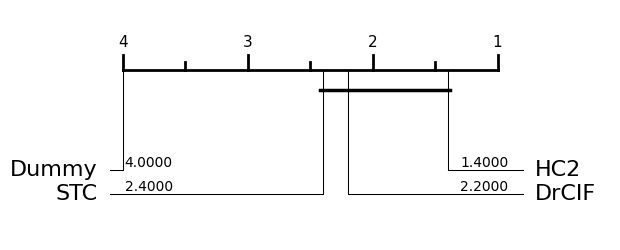

In [8]:
plt, _ = plot_critical_difference(np.array(table), list(table.columns))
plt.show()